# Simulación de control PID
El objetivo de este cuaderno es entender la simulacion de un controlador PID

## 1. Sistema a control

Antes de hablar del sistema de control, es importante entender el proceso que se desea controlar. Para lo anterior se tiene que 

![Imagen local](./images/sistema_control_pid.png)

Se debe crear la funcion de transferencia del sistema antes de proceder con la realimentación. Notese que esta compuesta por tres partes la función de transferencia

In [4]:
import control as ct 
import matplotlib.pyplot as plt

# System1
sys1 = ct.tf([0.016],[3,1])

# System2
sys2 = ct.tf([50],[30,1])

# System3
sys3 = ct.tf([1],[10,1])

# Series system
sysSeries = ct.series(sys1,sys2,sys3)
print(sysSeries)


            0.8
----------------------------
900 s^3 + 420 s^2 + 43 s + 1



Este es el sistema que deseamos realizar el analisis de estabilidad ante un control tipo proporcional. Para lo anterior se debe encontrar la funcion de transferencia del lazo cerrado

$$
H(s) = \frac{0.8 K_c}{900 s^3 + 420 s^2 + 43 s + 1 + 0.8 K_c}
$$

Posteriorment hacemos el analisis de Routh-Hurwitz para encontrar los valores de $K_c$ que hacen el sistema estable

|     |   |   |
|-----|---|---|
| $s^3$ | 900 | 43 |
| $s^2$ | 420 | 1 + 0.8 K_c |
| $s^1$ | 40.85 - 1.71 K_c | 0 |
| $s^0$ | 1 + 0.8 K_c | 0 |

Lo que implica que $-1.25 < K_c < 23.8$. Hagamos un analisis del comportamiento del sistema para diferentes valores de K_c

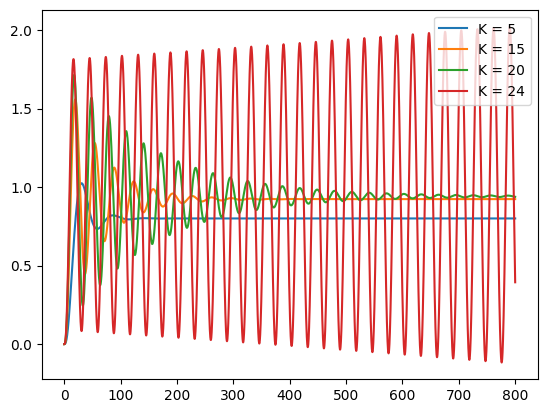

In [14]:
import numpy as np
# Lets compare different gain in the plot
K_values = [5, 15, 20, 24]

# Creating time and input vector
t = np.linspace(0, 800, 5000)
u = np.ones_like(t)

# Figure
plt.figure(1)

for K in K_values:
    # System
    feedback_sys = ct.feedback(ct.series(K,sysSeries),1)
    
    # Step response for the system
    t, y = ct.forced_response(feedback_sys, t, u)

    # Plot
    plt.plot(t, y, label=f'K = {K}')

plt.legend()
plt.show(block=False)




## 2. Control PID

Actualmente, vimos en clase la estructura de como es un controlador PID y su funcion de tranferencia, la cual esta dada por

- Control PI

$$
PI(s) = \frac{K_p s + K_i}{s}
$$
- Control PID
$$
PID(s) = \frac{K_d s^2 + K_p s + K_i}{s}
$$

Recuerde que la version que se presenta no es realizable, por lo que se debe hacer un ajuste para poder implementarlo. Una forma para volverlo realizable es adicionar un filtro en el denominador muy rapido. Quedando solo la parte derivativa como

$$
\frac{T_ds}{\tau_Ds+1}
$$

en donde $\tau_D$ tiene valores pequenos alrededor de 0.1. Vamos a proceder a simular el control PI

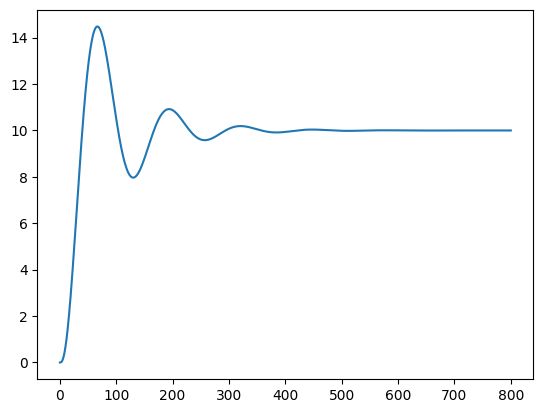

In [20]:
import numpy as np

# PI parameters
Kp = 1
Ki = 0.1

# Transfer function of PI controller
sys_pi = ct.tf([Kp,Ki],[1,0])

# Feedback system
feedback_sys = ct.feedback(ct.series(sys_pi,sysSeries),1)

# Force response
ref = 10
t = np.linspace(0, 800, 5000)
u = ref*np.ones_like(t)
t, y = ct.forced_response(feedback_sys, t, u)

# Plot
plt.figure(2)
plt.plot(t, y)
plt.show(block=False)

## 3. Sintonia de controladores 

Recuerde que existen diferentes metodos de sintonia de controladores tanto para respuesta en lazo abierto como respuesta en lazo cerrado. El ejemplo que vamos a simular es el metodo de ziegler Nichols de lazo cerrado. Recuerde que para este metodo se debe conocer la ganancoa ultima y el periodo ultimo. La ganancia ultima esta dada por 23.8 y el periodo ultimo usando el metodo grafico esta dada por 28 aproxiadamente. Con estos valores en mente procedemos

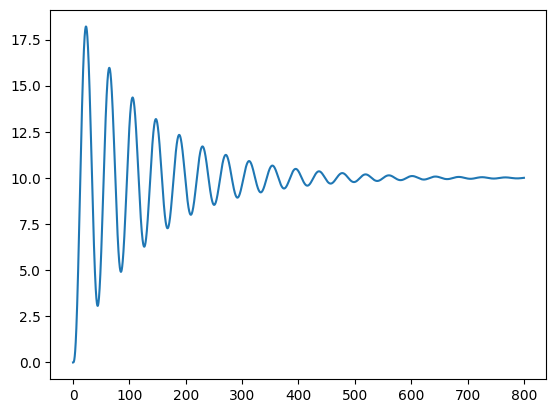

In [23]:
import numpy as np

K_u = 23.8
T_u = 28

# Zieglar-Nichols method
Kp = K_u/2.2
Ki = Kp/(T_u/1.2)

# Transfer function of PI controller
sys_pi = ct.tf([Kp,Ki],[1,0])

# Feedback system
feedback_sys = ct.feedback(ct.series(sys_pi,sysSeries),1)

# Force response
ref = 10
t = np.linspace(0, 800, 5000)
u = ref*np.ones_like(t)
t, y = ct.forced_response(feedback_sys, t, u)

# Plot
plt.figure(2)
plt.plot(t, y)
plt.show(block=False)

## Laboratorio

Implementar un control PID con diferentes aproximaciones y hacer sintonia